In [4]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import wilcoxon

plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (12,8)

maximum_nfv = 160 * 192 * 224

### EXPERIMENT 1
Predicted dice/nfv vs target dice/nfv using BlandAltman plot

In [5]:
# hyperpredict_bland_altman = pd.read_csv("../results/symnet_clapirn/optimal_hp_0.5%_label.csv")
hyperpredict_bland_altman = pd.read_csv("../results/symnet_clapirn/final_result/final_label_1.0_alpha_target.csv")
hyperpredict_bland_altman = hyperpredict_bland_altman.drop(columns=['label', 'target_label'])
hyperpredict_bland_altman = hyperpredict_bland_altman.groupby(['moving_index', 'fixed_index']).mean().reset_index()

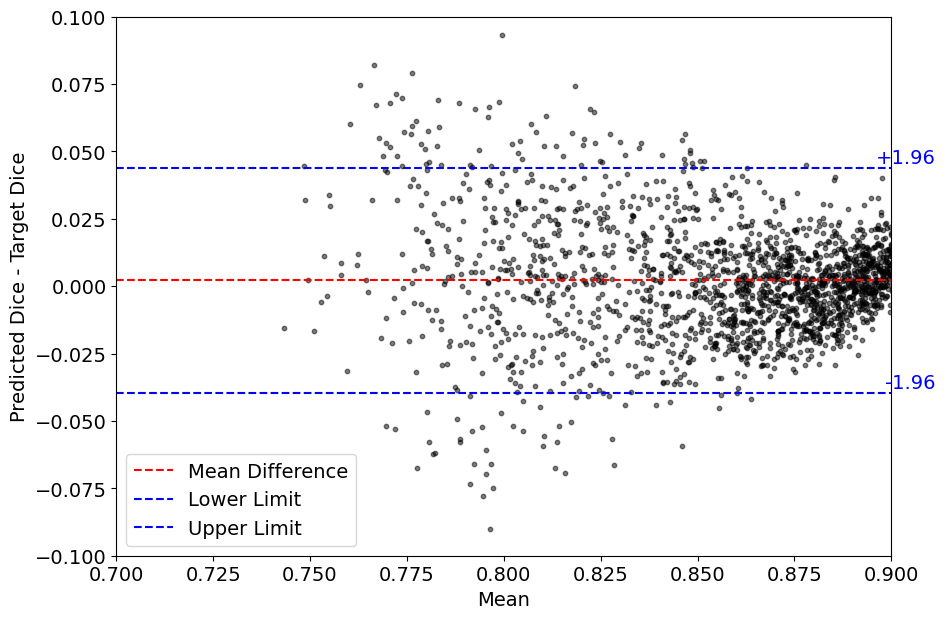

In [6]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10, 7))
differences = hyperpredict_bland_altman['predicted_dice'] - hyperpredict_bland_altman['target_dice']
means = (hyperpredict_bland_altman['predicted_dice'] + hyperpredict_bland_altman['target_dice']) / 2

mean_difference = np.mean(differences)
std_difference = np.std(differences)
lower_limit = mean_difference - 1.96 * std_difference
upper_limit = mean_difference + 1.96 * std_difference

plt.scatter(means, differences, color='black', s=10, alpha= 0.5)
plt.axhline(mean_difference, color='red', linestyle='--', label='Mean Difference')
plt.axhline(lower_limit, color='blue', linestyle='--', label='Lower Limit')
plt.axhline(upper_limit, color='blue', linestyle='--', label='Upper Limit')

plt.xlim(min(means) - 0.05, max(means) + 0.005)
plt.ylim(min(differences) - 0.05, max(differences) + 0.005)

plt.text(max(means), upper_limit , '+1.96', ha='right', va='bottom', color='blue')
plt.text(max(means), lower_limit, '-1.96', ha='right', va='bottom', color='blue')
plt.xlabel('Mean')
plt.ylabel('Predicted Dice - Target Dice')
plt.legend(loc = "lower left")
plt.xlim(0.7, 0.9)
plt.ylim(-0.1, 0.1)
plt.show()

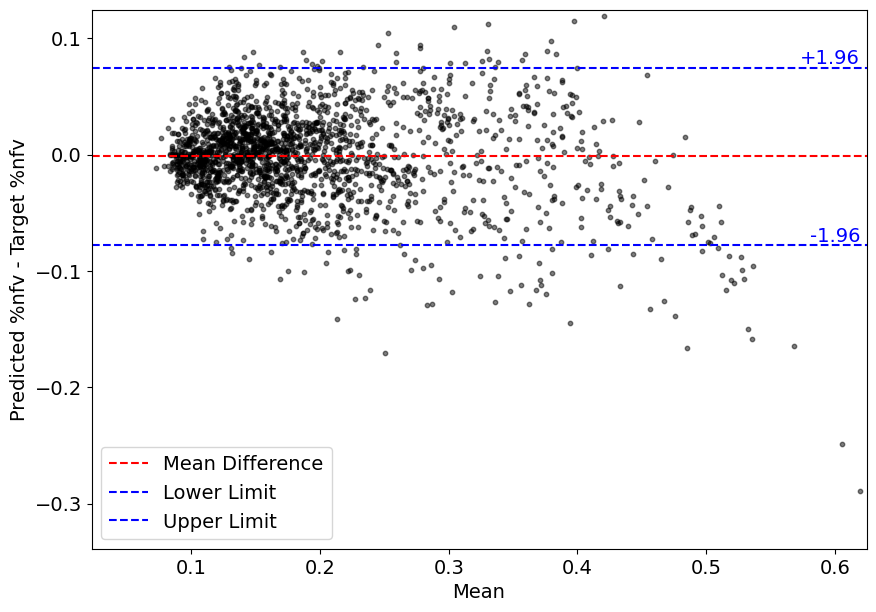

In [7]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(10, 7))
differences = (hyperpredict_bland_altman['predicted_nfv']/maximum_nfv * 100) - (hyperpredict_bland_altman['target_nfv']/maximum_nfv * 100)
means = ((hyperpredict_bland_altman['predicted_nfv']/maximum_nfv*100) +( hyperpredict_bland_altman['target_nfv']/maximum_nfv*100)) / 2

mean_difference = np.mean(differences)
std_difference = np.std(differences)
lower_limit = mean_difference - 1.96 * std_difference
upper_limit = mean_difference + 1.96 * std_difference

plt.scatter(means, differences, color='black', s=10, alpha= 0.5)
plt.axhline(mean_difference, color='red', linestyle='--', label='Mean Difference')
plt.axhline(lower_limit, color='blue', linestyle='--', label='Lower Limit')
plt.axhline(upper_limit, color='blue', linestyle='--', label='Upper Limit')

plt.xlim(min(means) - 0.05, max(means) + 0.005)
plt.ylim(min(differences) - 0.05, max(differences) + 0.005)

plt.text(max(means), upper_limit , '+1.96', ha='right', va='bottom', color='blue')
plt.text(max(means), lower_limit, '-1.96', ha='right', va='bottom', color='blue')
plt.xlabel('Mean')
plt.ylabel('Predicted %nfv - Target %nfv')
plt.legend(loc = "lower left")
plt.show()

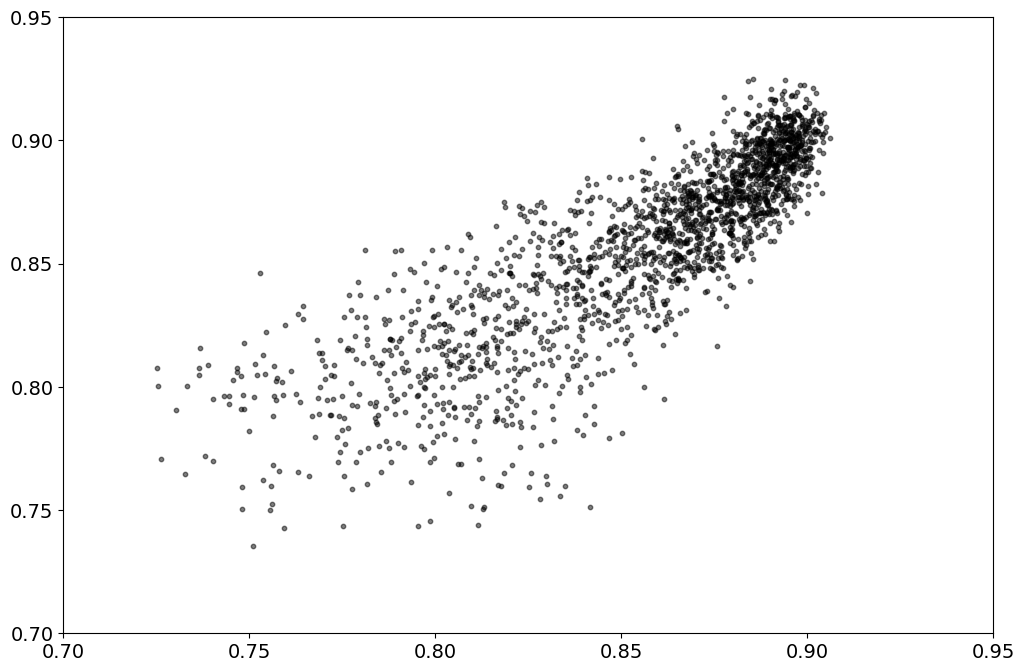

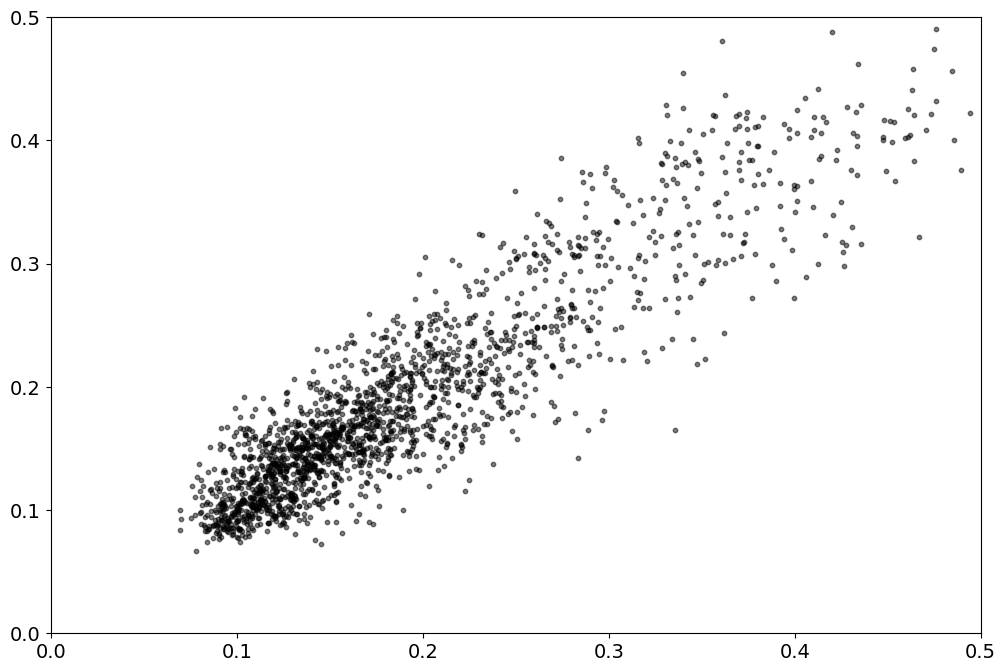

In [10]:
plt.scatter(hyperpredict_bland_altman['target_dice'], hyperpredict_bland_altman['predicted_dice'], color='black', s=10, alpha= 0.5)
plt.xlim(0.7, 0.95)
plt.ylim(0.7, 0.95)
plt.show()

plt.scatter(hyperpredict_bland_altman['target_nfv']/maximum_nfv*100, hyperpredict_bland_altman['predicted_nfv']/maximum_nfv*100, color='black', s=10, alpha= 0.5)
plt.xlim(0, 0.5)
plt.ylim(0, 0.5)
plt.show()

In [ ]:
#statistical analysis
#mean difference between predicted and target dice
hyperpredict_bland_altman["dice_difference"] = abs(hyperpredict_bland_altman["predicted_dice"] - hyperpredict_bland_altman["target_dice"])
mean_difference = hyperpredict_bland_altman["dice_difference"].mean()
std = hyperpredict_bland_altman["dice_difference"].std()
print("mean and standard deviation of dice difference: ", mean_difference, std)

In [ ]:
#mean difference between predicted and target nfv
hyperpredict_bland_altman["nfv_difference"] = abs((hyperpredict_bland_altman["predicted_nfv"]/maximum_nfv *100) - (hyperpredict_bland_altman["target_nfv"]/maximum_nfv *100))
mean_difference = hyperpredict_bland_altman["nfv_difference"].mean()
std = hyperpredict_bland_altman["nfv_difference"].std()
print("mean and standard deviation of nfv difference: ", mean_difference, std)

### MAE of difference


In [8]:
# hyperpredict_bland_altman_mae = pd.read_csv("../results/symnet_clapirn/sampled_lamda_values_images.csv")
hyperpredict_bland_altman_mae = pd.read_csv("../results/symnet_clapirn/final_result/sensitivity_analysis/xavier_1.0_seeded_target.csv")
hyperpredict_bland_altman_mae["lamda"] = hyperpredict_bland_altman_mae["lamda"].round(3)
hyperpredict_bland_altman_mae["dice_difference"] = hyperpredict_bland_altman_mae["predicted_dice"] - hyperpredict_bland_altman_mae["target_dice"]
hyperpredict_bland_altman_mae["nfv_difference"] = (hyperpredict_bland_altman_mae["predicted_nfv"]/ maximum_nfv)*100 - (hyperpredict_bland_altman_mae["target_nfv"]/maximum_nfv)*100



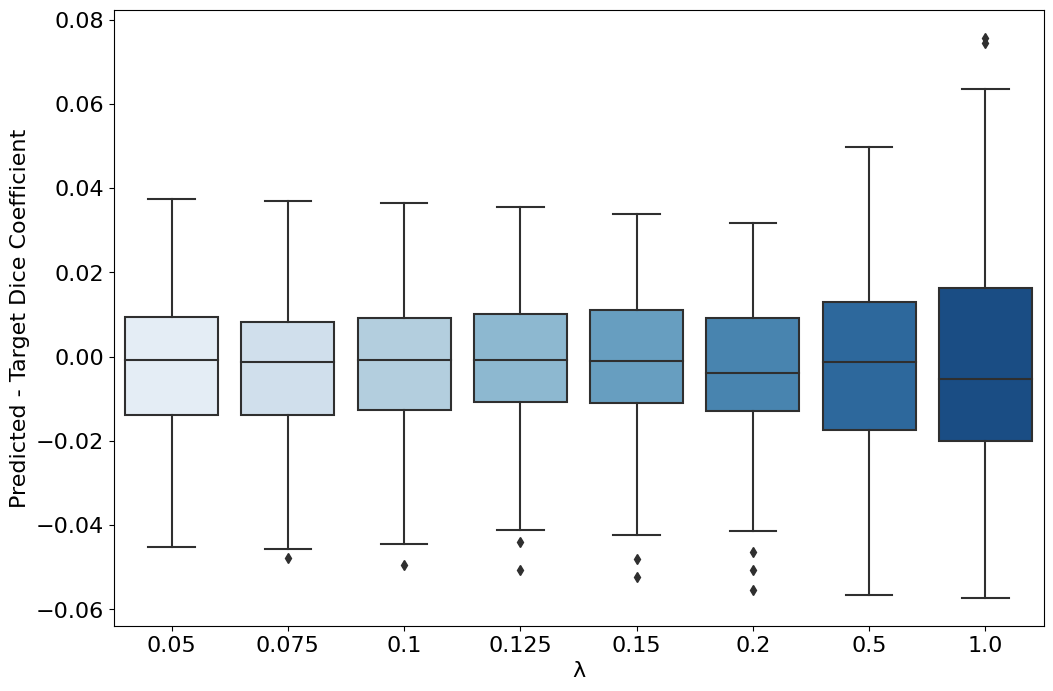

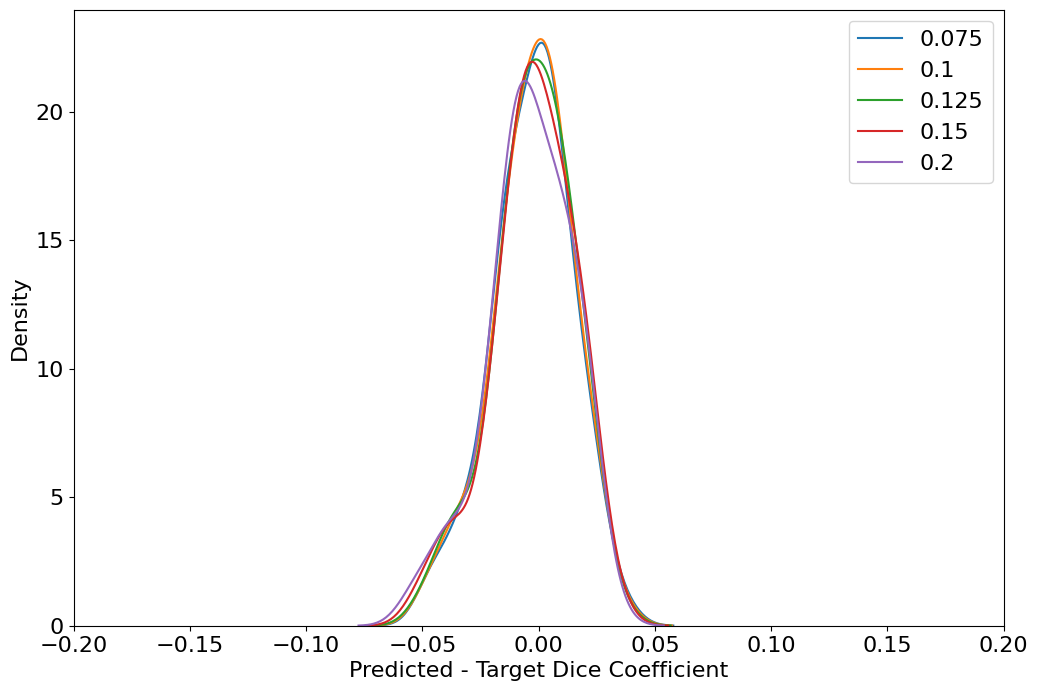

In [9]:
plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (12,8)
sns.boxplot(x="lamda", y="dice_difference", data=hyperpredict_bland_altman_mae, palette="Blues")
plt.ylabel("Predicted - Target Dice Coefficient")
plt.xlabel("λ")
plt.show()
hyperpredict_bland_altman_mae_sub = hyperpredict_bland_altman_mae[hyperpredict_bland_altman_mae["lamda"] != 1.0]
hyperpredict_bland_altman_mae_sub = hyperpredict_bland_altman_mae_sub[hyperpredict_bland_altman_mae_sub["lamda"] != 0.5]
hyperpredict_bland_altman_mae_sub = hyperpredict_bland_altman_mae_sub[hyperpredict_bland_altman_mae_sub["lamda"] != 0.05]
for i in hyperpredict_bland_altman_mae_sub["lamda"].unique():
    data = hyperpredict_bland_altman_mae_sub[hyperpredict_bland_altman_mae_sub["lamda"] == i]
    sns.kdeplot(data=data, x="dice_difference", label=i)
plt.xlabel("Predicted - Target Dice Coefficient")
plt.xlim(-0.2, 0.2)
plt.legend()
plt.show()


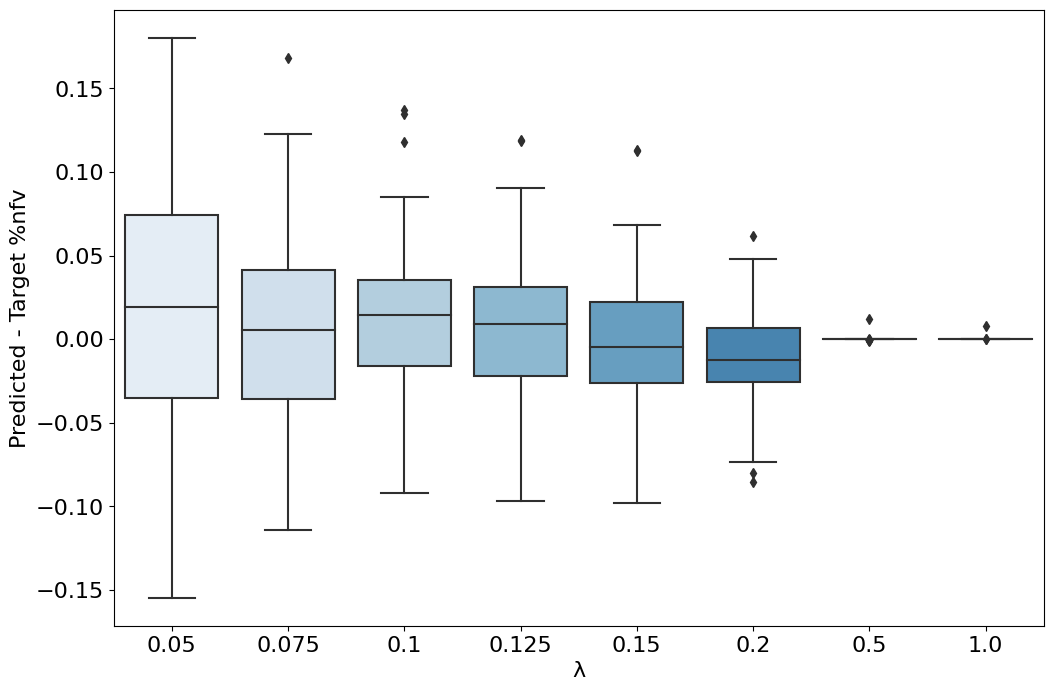

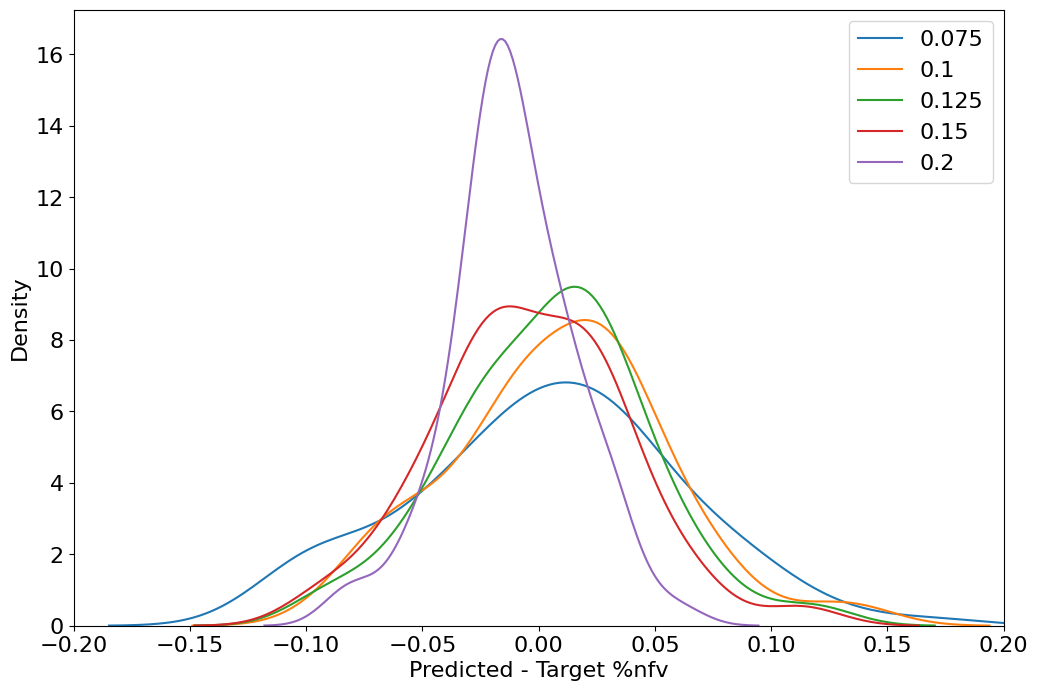

In [10]:

#nfv
sns.boxplot(x="lamda", y="nfv_difference", data=hyperpredict_bland_altman_mae, palette="Blues")
plt.ylabel("Predicted - Target %nfv")
plt.xlabel("λ")
plt.show()

hyperpredict_bland_altman_mae_sub = hyperpredict_bland_altman_mae[hyperpredict_bland_altman_mae["lamda"] != 1.0]
hyperpredict_bland_altman_mae_sub = hyperpredict_bland_altman_mae_sub[hyperpredict_bland_altman_mae_sub["lamda"] != 0.5]
hyperpredict_bland_altman_mae_sub = hyperpredict_bland_altman_mae_sub[hyperpredict_bland_altman_mae_sub["lamda"] != 0.05]
for i in hyperpredict_bland_altman_mae_sub["lamda"].unique():
    data = hyperpredict_bland_altman_mae_sub[hyperpredict_bland_altman_mae_sub["lamda"] == i]
    sns.kdeplot(data=data, x="nfv_difference", label=i)
plt.xlabel("Predicted - Target %nfv")
plt.xlim(-0.2, 0.2)
plt.legend()
plt.show()



##### COMBINED EVALUATION OF DICE AND NFV

/tmp/ipykernel_310566/1369927253.py:9: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.scatterplot(data=hyperpredict_bland_combined, x="predicted_nfv", y="predicted_dice", hue="lamda", palette=palette, legend='full')


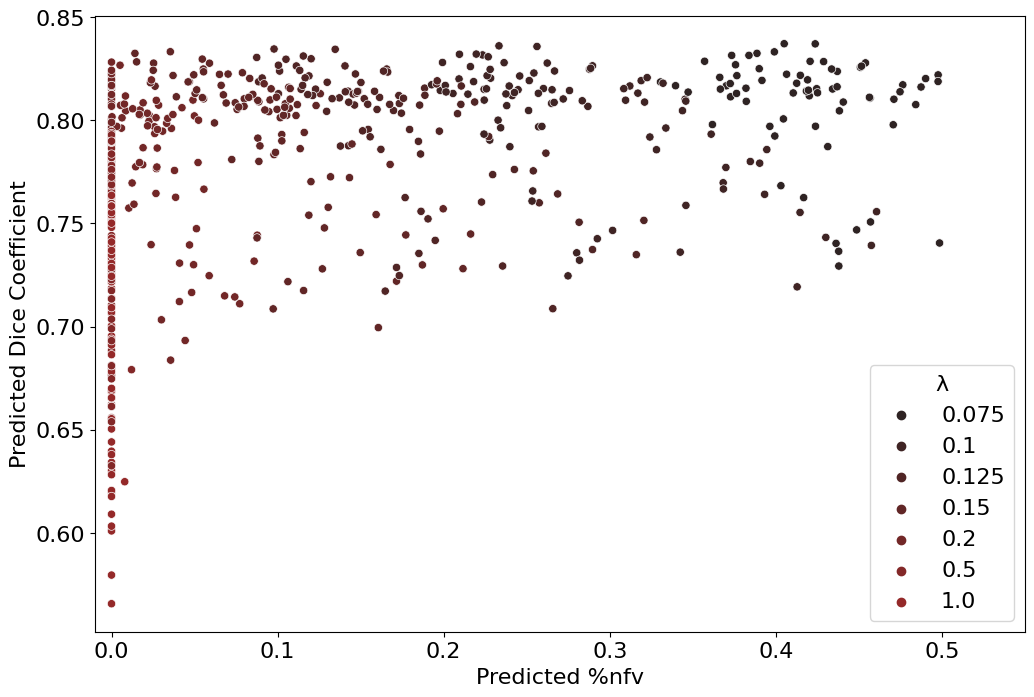

In [12]:
hyperpredict_bland_combined = pd.read_csv("../results/symnet_clapirn/final_result/sensitivity_analysis/xavier_1.0_seeded_target.csv")
# hyperpredict_bland_combined = pd.read_csv("../results/symnet_clapirn/sampled_lamda_values_images.csv")
hyperpredict_bland_combined["lamda"] = hyperpredict_bland_combined["lamda"].round(3)
palette = palette = sns.dark_palette("brown", n_colors=8)
hyperpredict_bland_combined["predicted_nfv"] = hyperpredict_bland_combined["predicted_nfv"]/maximum_nfv*100
hyperpredict_bland_combined= hyperpredict_bland_combined[hyperpredict_bland_combined["predicted_nfv"] <= 0.5]

sns.scatterplot(data=hyperpredict_bland_combined, x="predicted_nfv", y="predicted_dice", hue="lamda", palette=palette, legend='full')

plt.xlabel("Predicted %nfv")
plt.ylabel("Predicted Dice Coefficient")
plt.legend(title="λ")
plt.xlim(-0.01, 0.55)
plt.show()


### Experiment 2
using optimal hp(selected for specific labels and < 0.05% of nfv>) for each pair, ran optimal samples on clpairn and compared it with CV using a single HP for entire set

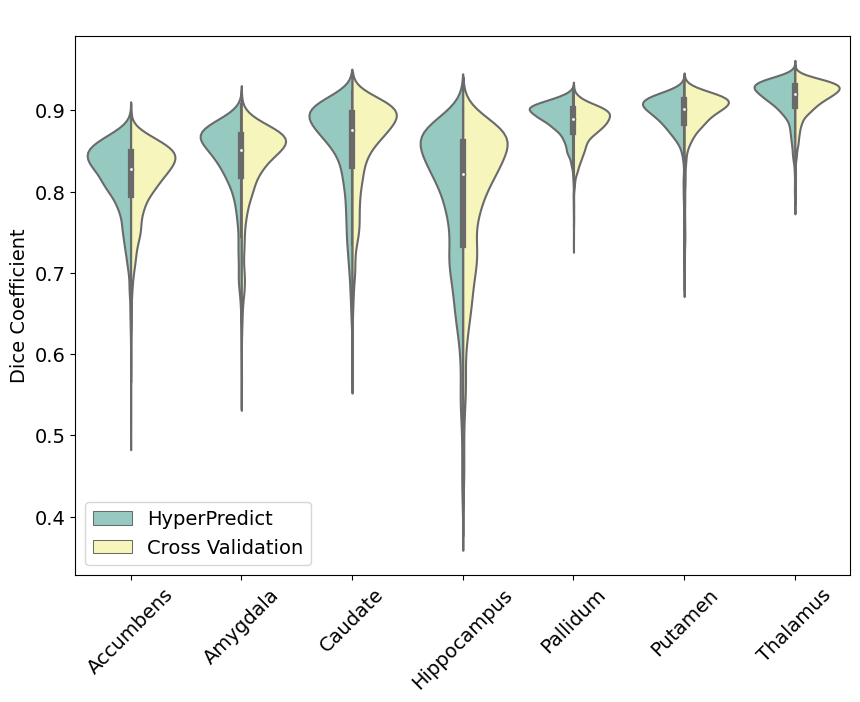

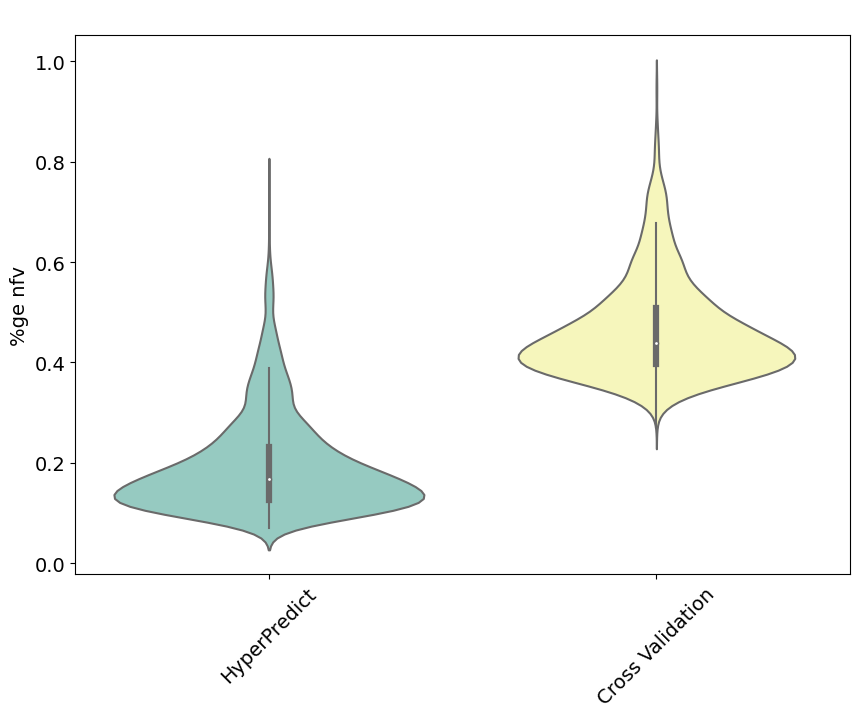

In [13]:
hyperpredict_exp2 = pd.read_csv("../results/symnet_clapirn/final_result/final_label_1.0_alpha_target.csv")

hyperpredict_exp2.rename(columns={"target_dice": "dice"}, inplace=True)
hyperpredict_exp2.rename(columns={"target_nfv": "nfv"}, inplace=True)
hyperpredict_exp2["Method"] = "HyperPredict"
selected_labels = ["Accumbens", "Amygdala", "Caudate", "Hippocampus", "Pallidum", "Putamen", "Thalamus"]
hyperpredict_exp2 = hyperpredict_exp2[hyperpredict_exp2["label"].isin(selected_labels)].reset_index(drop=True)


cross_validation_exp2 =  pd.read_csv("../results/cross_validation/clapirn/clapirn_grid_search_optimal_0.075.csv")
cross_validation_exp2 = cross_validation_exp2[cross_validation_exp2["label"].isin(selected_labels)].reset_index(drop=True)
cross_validation_exp2.rename(columns={"target_dice": "dice"}, inplace=True)
cross_validation_exp2.rename(columns={"target_nfv": "nfv"}, inplace=True)
cross_validation_exp2["Method"] = "Cross Validation"

hyperpredict_vs_crossval = pd.concat([hyperpredict_exp2, cross_validation_exp2])
hyperpredict_vs_crossval["nfv_percentage"] = (hyperpredict_vs_crossval["nfv"] / maximum_nfv) *100
hyperpredict_vs_crossval.drop(columns=["Unnamed: 0"], inplace=True)

plt.figure(figsize=(10, 7))
plt.rcParams.update({'font.size': 14})
sns.violinplot(x="label", y="dice", hue="Method", data=hyperpredict_vs_crossval, palette="Set3", split=True, as_cmap=True)
plt.title(" ");
plt.xlabel("");
plt.ylabel("Dice Coefficient");
plt.xticks(rotation=45)
plt.grid(False)
plt.legend(loc='lower left')
plt.show();



#plot nfv
hyperpredict_exp2_nfv = hyperpredict_exp2.drop(columns=['label','target_label', 'Method'])
cross_validation_exp2_nfv = cross_validation_exp2.drop(columns=['label', 'Method'])
hyperpredict_exp2_nfv = hyperpredict_exp2_nfv.groupby(["moving_index", "fixed_index"]).mean().reset_index()
hyperpredict_exp2_nfv["Method"] = "HyperPredict"
cross_validation_exp2_nfv = cross_validation_exp2_nfv.groupby(["moving_index", "fixed_index"]).mean().reset_index()
cross_validation_exp2_nfv["Method"] = "Cross Validation"
hyperpredict_vs_crossval_nfv = pd.concat([hyperpredict_exp2_nfv, cross_validation_exp2_nfv])
hyperpredict_vs_crossval_nfv["nfv_percentage"] = (hyperpredict_vs_crossval_nfv["nfv"] / maximum_nfv) *100


plt.figure(figsize=(10, 7))
plt.rcParams.update({'font.size': 14})
sns.violinplot(x="Method", y="nfv_percentage", data=hyperpredict_vs_crossval_nfv, palette="Set3", hue=None, split=False, as_cmap=True)

plt.title(" ");
plt.xlabel("");
plt.ylabel("%ge nfv");
plt.xticks(rotation=45)
plt.grid(False)
plt.show();



In [ ]:
#statistical analysis
merged_df = pd.merge(hyperpredict_exp2, cross_validation_exp2, on=['moving_index', 'fixed_index', 'label'])
merged_df["dice_difference"] = abs(merged_df["dice_x"] - merged_df["dice_y"])
mean_difference = merged_df["dice_difference"].mean()
std = merged_df["dice_difference"].std()
print("mean and standard deviation of dice difference: ", mean_difference, std)

merged_df["nfv_difference"] = abs((merged_df["nfv_x"]/maximum_nfv *100) - (merged_df["nfv_y"]/maximum_nfv *100))
mean_difference = merged_df["nfv_difference"].mean()
std = merged_df["nfv_difference"].std()
print("mean and standard deviation of nfv difference: ", mean_difference, std)

# wilcoxon signed rank test
hyperpredict_exp2_wilcoxon = hyperpredict_exp2.drop(columns=['target_label', 'Method'], inplace=True)
hyperpredict_exp2_wilcoxon = hyperpredict_exp2.groupby(['label']).mean().reset_index()
cross_validation_exp2_wilcoxon = cross_validation_exp2.drop(columns=[ 'Method'], inplace = True)
cross_validation_exp2_wilcoxon = cross_validation_exp2.groupby(['label']).mean().reset_index()
merged_df_wilcoxon = pd.merge(hyperpredict_exp2_wilcoxon, cross_validation_exp2_wilcoxon, on=['label'])

dice_statistics, dice_p_value  = wilcoxon(merged_df_wilcoxon["dice_x"], merged_df_wilcoxon["dice_y"])
print("dice wilcoxon: ", dice_p_value)
nfv_statistics, nfv_p_value = wilcoxon(merged_df_wilcoxon["nfv_x"]/maximum_nfv*100, merged_df_wilcoxon["nfv_y"]/maximum_nfv*100)
print("nfv wilcoxon: ", nfv_p_value)


##### CV VS HP, BEST VS WORSE CASE

In [17]:
hyperpredict_exp2_case = hyperpredict_exp2.drop(columns=['label'])
hyperpredict_exp2_case = hyperpredict_exp2_case.groupby(['moving_index', 'fixed_index']).mean().reset_index()
cross_validation_exp2_case = cross_validation_exp2.drop(columns=['label', 'Unnamed: 0'])
cross_validation_exp2_case = cross_validation_exp2_case.groupby(['moving_index', 'fixed_index']).mean().reset_index()
merged_df_case = pd.merge(hyperpredict_exp2_case, cross_validation_exp2_case, on=['moving_index', 'fixed_index'])

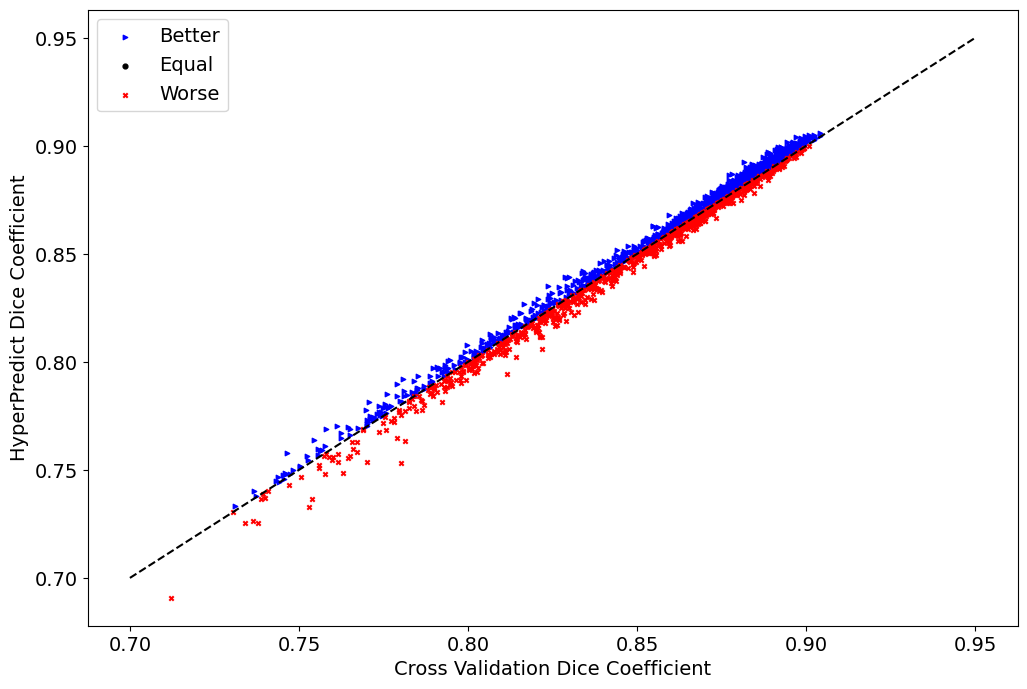

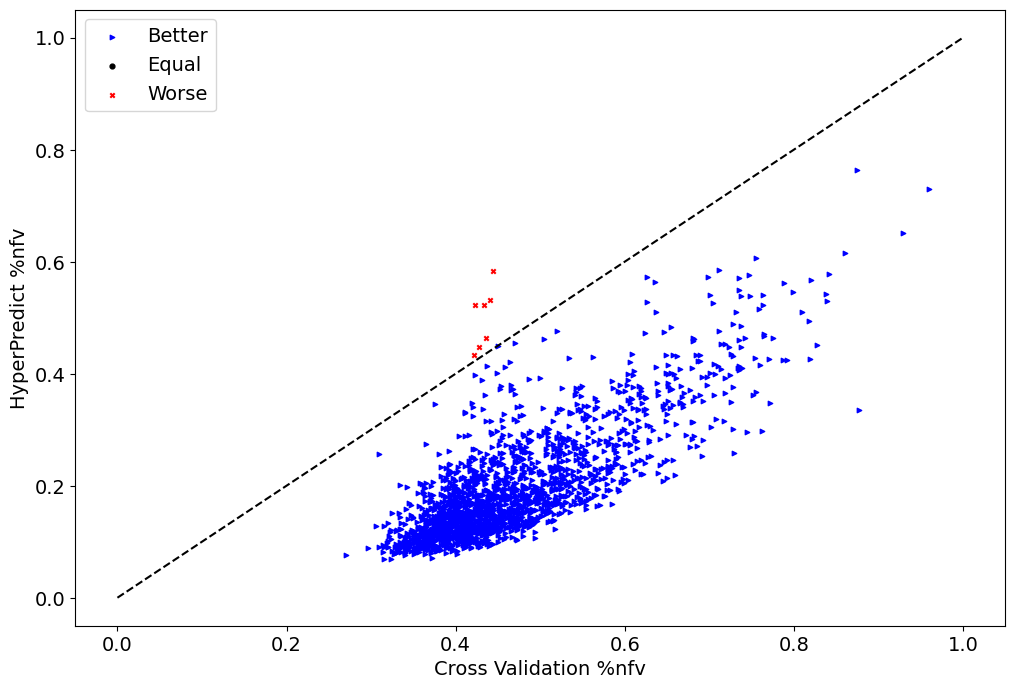

In [18]:


x = np.linspace(0.70, 0.95, 50)
y = x

#cross valdidation vs hyperpredict
equal = merged_df_case["dice_y"] == merged_df_case["dice_x"]
worse_case = merged_df_case["dice_y"] > merged_df_case["dice_x"]
best_case = merged_df_case["dice_y"] < merged_df_case["dice_x"]

plt.scatter(merged_df_case[best_case]["dice_y"], merged_df_case[best_case]["dice_x"], color='blue', s=10, marker='>', label = 'Better')
plt.scatter(merged_df_case[equal]["dice_y"], merged_df_case[equal]["dice_x"], color='black', s=12, marker='o', label = 'Equal')
plt.scatter(merged_df_case[worse_case]["dice_y"], merged_df_case[worse_case]["dice_x"], color='red', s=10,  marker='x', label = 'Worse')
plt.xlabel("Cross Validation Dice Coefficient")
plt.ylabel("HyperPredict Dice Coefficient")
plt.plot(x, y, color='black', linestyle='--')
plt.legend(loc = "best")
plt.show()


#nfv
merged_df_case["nfv_x"] = merged_df_case["nfv_x"].round(3)
merged_df_case["nfv_y"] = merged_df_case["nfv_y"].round(3)

x = np.linspace(0, 1, 50)
y = x

equal = merged_df_case["nfv_y"] == merged_df_case["nfv_x"]
worse_case = merged_df_case["nfv_y"] < merged_df_case["nfv_x"]
best_case = merged_df_case["nfv_y"] > merged_df_case["nfv_x"]
plt.scatter(merged_df_case[best_case]["nfv_y"]/maximum_nfv*100, merged_df_case[best_case]["nfv_x"]/maximum_nfv*100, color='blue', s=10,  marker='>', label = 'Better')
plt.scatter(merged_df_case[equal]["nfv_y"]/maximum_nfv*100, merged_df_case[equal]["nfv_x"]/maximum_nfv*100, color='black', s=12, marker='o', label = 'Equal')
plt.scatter(merged_df_case[worse_case]["nfv_y"]/maximum_nfv*100, merged_df_case[worse_case]["nfv_x"]/maximum_nfv*100, color='red', s=10,  marker='x', label = 'Worse')


plt.plot(x, y, color='black', linestyle='--')
plt.xlabel("Cross Validation %nfv")
plt.ylabel("HyperPredict %nfv")
plt.legend(loc = "best")
plt.show()

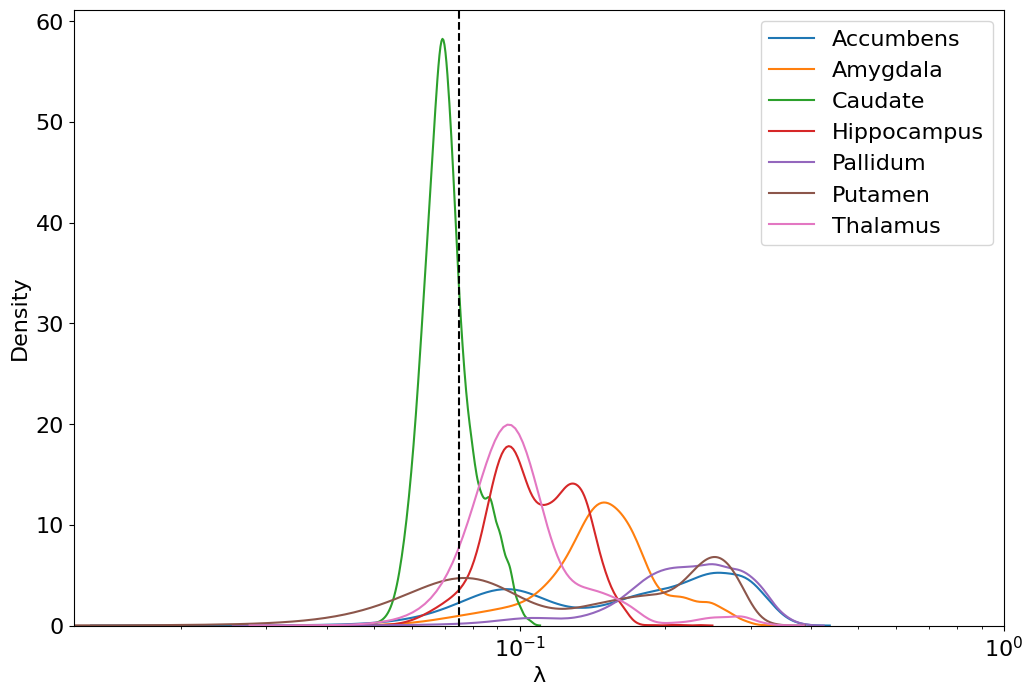

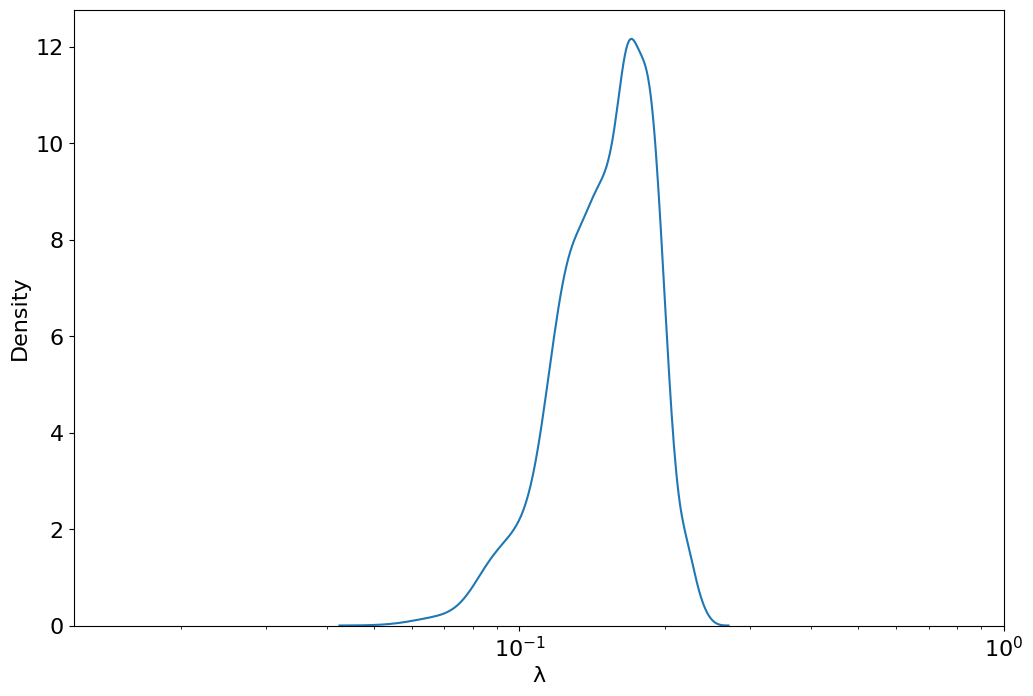

In [137]:
#distribution of optimal lamda per label 
for label in hyperpredict_exp2['label'].unique():
    subset_data = hyperpredict_exp2[hyperpredict_exp2['label'] == label]
    sns.kdeplot(data=subset_data, x='lamda', label=label)

plt.axvline(x=0.075, color='black', linestyle='--')
plt.xlabel('λ')
plt.ylabel('Density')
plt.legend()
plt.xscale('log')
plt.xlim(0.012, 1)

plt.show()


hyperpredict_exp2_img_dist = hyperpredict_exp2.drop(columns=["label"])
hyperpredict_exp2_img_dist = hyperpredict_exp2_img_dist.groupby(["pair_idx"]).mean().reset_index()
sns.kdeplot(data=hyperpredict_exp2_img_dist, x='lamda')
plt.xlabel('λ')
plt.xscale('log')
plt.xlim(0.012, 1)
plt.ylabel('Density')
plt.show()

### EXPERIMENT 3
Optimal Hyperparameter per image pair


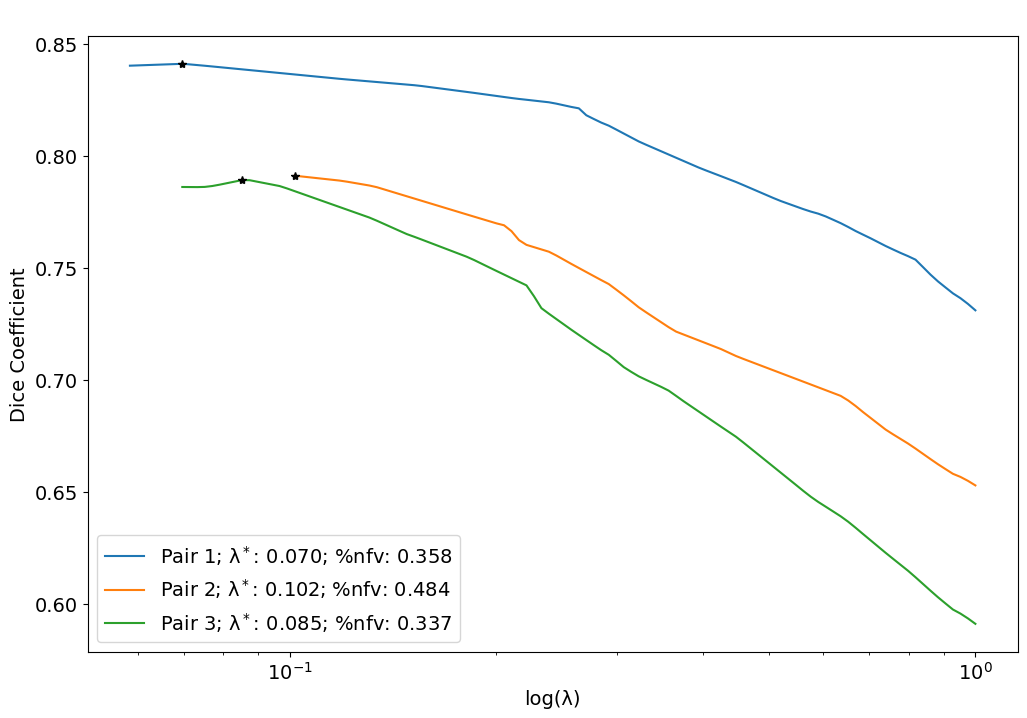

In [37]:
hyperpredict_exp3 = pd.read_csv("../results/symnet_clapirn/mean_encoding_testing_200_hps_labels.csv")

hyperpredict_exp3 = hyperpredict_exp3[hyperpredict_exp3["predicted_nfv"] < (0.005 * maximum_nfv)].reset_index(drop=True)
hyperpredict_exp3 = hyperpredict_exp3.drop(columns = ['label'])
hyperpredict_exp3 = hyperpredict_exp3.groupby(['pair_idx', 'lamda']).mean().reset_index()


indexes = [14, 99, 129]
count = 1
for i in range(150):
    if i in indexes:

        lamda = hyperpredict_exp3[hyperpredict_exp3["pair_idx"] == i]["lamda"].unique()
        max_dice = hyperpredict_exp3[hyperpredict_exp3["pair_idx"] == i]["predicted_dice"]
        lamda_max_dice = hyperpredict_exp3["lamda"].loc[max_dice.idxmax()]

        max_value = max_dice.max()
        max_index = max_dice.idxmax()
        lamda_max_value = hyperpredict_exp3.loc[max_index]["lamda"]

        moving_index = hyperpredict_exp3[hyperpredict_exp3["pair_idx"] == i]["moving_index"].loc[max_dice.idxmax()]
        fixed_index = hyperpredict_exp3[hyperpredict_exp3["pair_idx"] == i]["fixed_index"].loc[max_dice.idxmax()]
        predicted_voxels = hyperpredict_exp3[hyperpredict_exp3["pair_idx"] == i]["predicted_nfv"].loc[max_dice.idxmax()]
        
        predicted_dice_value = hyperpredict_exp3[hyperpredict_exp3["pair_idx"] == i]["predicted_dice"].values

        sns.lineplot(x=lamda, y=predicted_dice_value, alpha=1, label=f"Pair {count}; λ$^*$: {lamda_max_dice:.3f}; %nfv: {(predicted_voxels/maximum_nfv)*100:.3f}")
        if lamda_max_value > 0:
            plt.plot(lamda_max_value, max_value, '*', color='black')
        else:
            plt.plot(lamda_max_value,+1e-5, max_value, '*', color='black')

        count +=1
plt.legend(loc= "lower left");

plt.xlabel("log(λ)");
plt.ylabel("Dice Coefficient");
plt.title(" ");
plt.xscale('log')



### EXPERIMENT 4
Optimal Hyperparameter per label

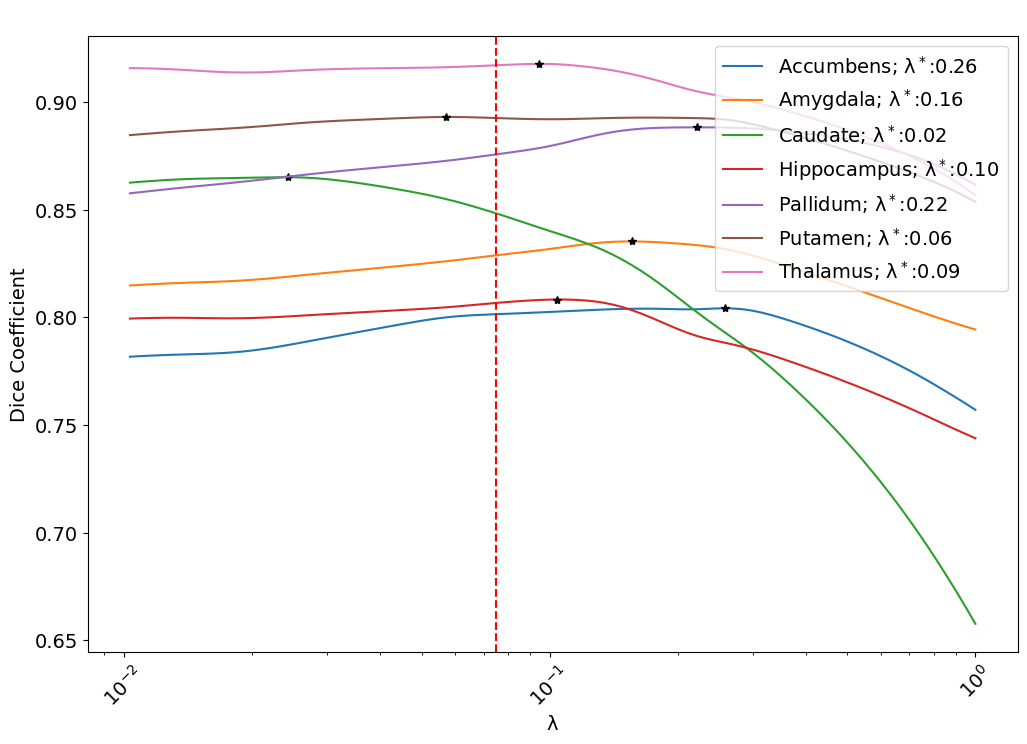

In [125]:
# hyperpredict_exp4 = pd.read_csv("../results/symnet_clapirn/mean_encoding_testing_200_hps_labels.csv")
hyperpredict_exp4 = pd.read_csv("../results/symnet_clapirn/final_result/final_label_no_optim.csv")
hyperpredict_exp4 = hyperpredict_exp4[hyperpredict_exp4["lamda"] > 0.01]



hyperpredict_exp4 = hyperpredict_exp4.groupby(['label', 'lamda']).mean().reset_index()
short_label = ['Thalamus',  'Amygdala', 'Pallidum', 'Caudate', 'Hippocampus', 'Putamen', 'Accumbens']

for idx, label in enumerate(hyperpredict_exp4["label"].unique()):
    if label in short_label:
        lamda_max_index = hyperpredict_exp4["lamda"][hyperpredict_exp4[hyperpredict_exp4["label"] == label]["predicted_dice"].idxmax()]
        maximum_value = hyperpredict_exp4[hyperpredict_exp4["label"] == label]["predicted_dice"].max()
        lam = hyperpredict_exp4[hyperpredict_exp4["label"] == label]["lamda"]
        sns.lineplot(x = lam, y = hyperpredict_exp4[hyperpredict_exp4["label"] == label]["predicted_dice"],label = f"{label}; λ$^*$:{lamda_max_index:.2f} ")
        plt.plot(lamda_max_index, maximum_value, '*', color='black')

plt.axvline(x=0.075, color='red', linestyle='--', alpha = 1.0)
plt.legend(loc="upper right")
plt.xlabel("λ")
plt.ylabel("Dice Coefficient")
plt.xticks(rotation=45)
plt.xscale('log')
plt.title(" ");

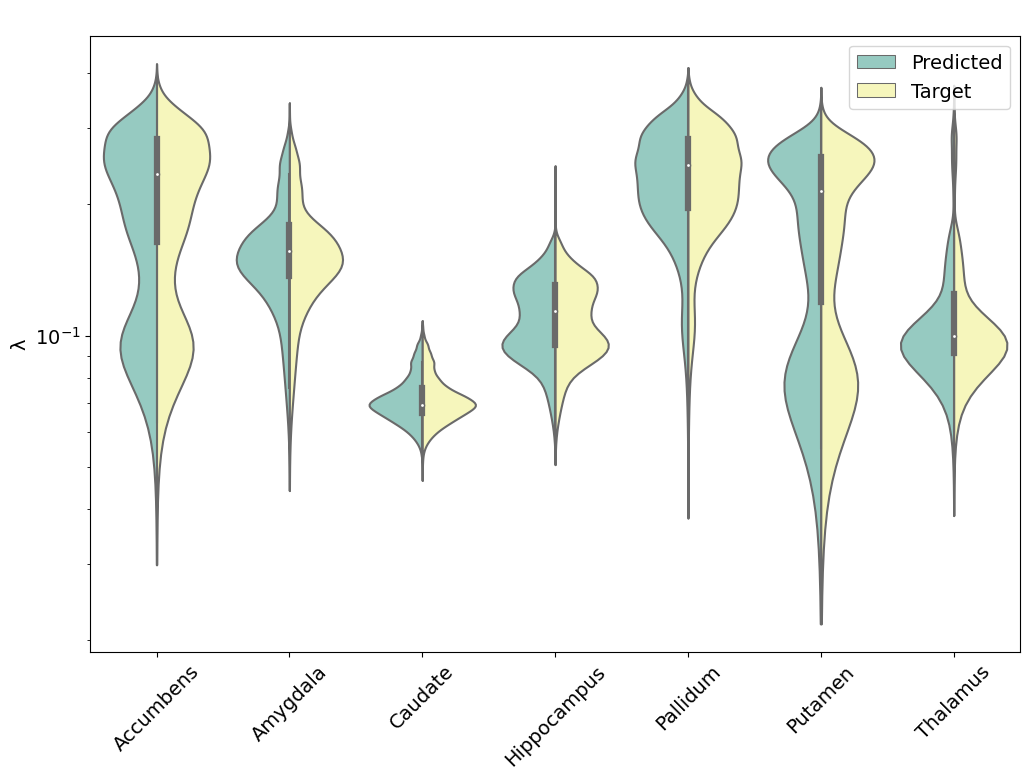

In [71]:
# compare_target_predicted = pd.read_csv("../results/symnet_clapirn/optimal_hp_0.5%_label.csv")
compare_target_predicted = pd.read_csv("../results/symnet_clapirn/final_result/final_label_1.0_alpha_target.csv")

compare_target_predicted.drop(columns=["target_label"], inplace=True)
grouped_df_target_lamda = compare_target_predicted.reset_index()
grouped_df_target_lamda = grouped_df_target_lamda.groupby(["pair_idx", "label"]).apply(lambda x: x.loc[x['target_dice'].idxmax()])["lamda"]
grouped_df_target_lamda = grouped_df_target_lamda.reset_index()
grouped_df_target_lamda["stage"] = "Target"

grouped_df_predicted_lamda = compare_target_predicted.reset_index()
grouped_df_predicted_lamda = grouped_df_predicted_lamda.groupby(["pair_idx", "label"]).apply(lambda x: x.loc[x['predicted_dice'].idxmax()])["lamda"]
grouped_df_predicted_lamda = grouped_df_predicted_lamda.reset_index()
grouped_df_predicted_lamda["stage"] = "Predicted"


grouped_df = pd.concat([grouped_df_predicted_lamda, grouped_df_target_lamda])
sns.violinplot(x="label", y="lamda", hue="stage", data=grouped_df, palette="Set3", split=True, as_cmap=True)
plt.legend(loc='upper right')

plt.ylabel("λ")
plt.xlabel("")
plt.xticks(rotation=45)
plt.title(" ");
plt.yscale('log')
plt.show()


In [ ]:
#statistical analysis
#mean difference bbetween predicted and target dice
compare_target_predicted["dice_difference"] = abs(compare_target_predicted["predicted_dice"] - compare_target_predicted["target_dice"])
mean_difference = compare_target_predicted["dice_difference"].mean()
std = compare_target_predicted["dice_difference"].std()
print("mean and standard deviation of dice difference: ", mean_difference, std)


### COMPARING ALTERNATE METHODS

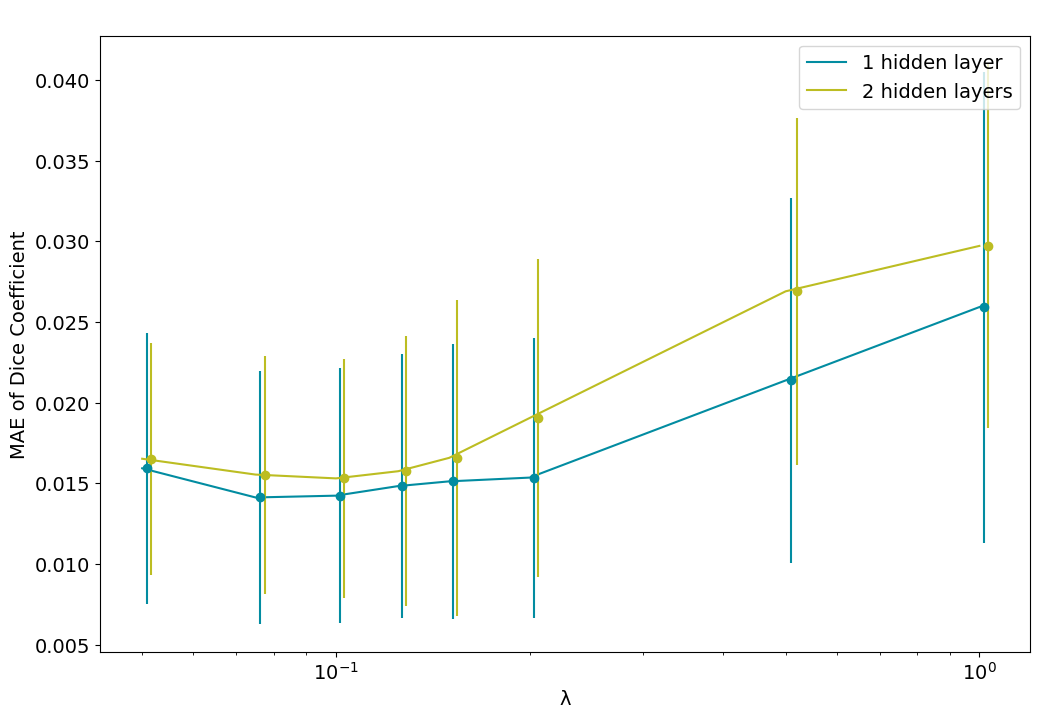

In [43]:
#using 1 hidden layer
one_hidden_layer = pd.read_csv("../results/symnet_clapirn/alternative_models/mean_encoding_1hidden_layer.csv")
two_hidden_layers = pd.read_csv("../results/symnet_clapirn/alternative_models/mean_encoding_2hidden_layer.csv")
lamda = one_hidden_layer["lamda"].unique()
lam_log = np.where(lamda > 0, np.log(lamda), np.log(lamda + 1e-5))


x_errorbar = [0.0008,0.0013 ,0.0015,0.0017,0.0020,0.003,0.01,0.015] 

#one hidden layer
one_hidden_layer["dice_difference"] = abs(one_hidden_layer["predicted_dice"] - one_hidden_layer["target_dice"])
one_hidden_layer["std_dev"] = np.std(one_hidden_layer["predicted_dice"] - one_hidden_layer["target_dice"], axis = 0)
mean_difference =  one_hidden_layer.groupby("lamda").mean().reset_index()
std_dev = one_hidden_layer.groupby("lamda").std().reset_index()
sns.lineplot(x=lamda, y=mean_difference["dice_difference"], color="#028ca1")
plt.errorbar(x_errorbar+lamda, mean_difference["dice_difference"], yerr=std_dev["dice_difference"], fmt='o', color = '#028ca1')


#two hidden layers
two_hidden_layers["dice_difference"] = abs(two_hidden_layers["predicted_dice"] - two_hidden_layers["target_dice"])
mean_difference =  two_hidden_layers.groupby("lamda").mean().reset_index()
std_dev = two_hidden_layers.groupby("lamda").std().reset_index()
sns.lineplot(x=lamda, y=mean_difference["dice_difference"], color="#bcbd22")
plt.errorbar([x*2 for x in x_errorbar]+lamda, mean_difference["dice_difference"], yerr=std_dev["dice_difference"], fmt='o', color = '#bcbd22')


# Create custom legend
custom_legend = [
    plt.Line2D([0], [0], color='#028ca1',  linestyle='-', markersize=5),
    plt.Line2D([0], [0], color='#bcbd22', linestyle='-', markersize=5),
]
legend_labels = ['1 hidden layer', '2 hidden layers']

plt.legend(custom_legend, legend_labels)
plt.title(" ");
plt.xlabel("λ");
plt.ylabel("MAE of Dice Coefficient");
plt.xscale("log")
plt.show()


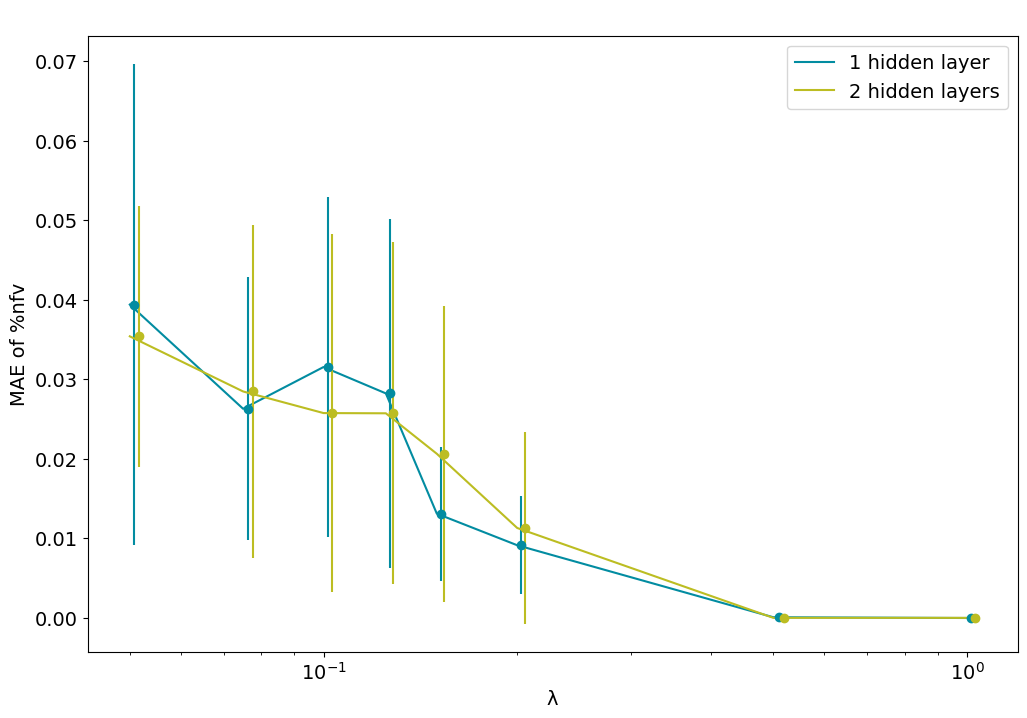

In [44]:
#nfv difference
one_hidden_layer["nfv_difference"] = abs((one_hidden_layer["predicted_nfv"]/ maximum_nfv)*100 - (one_hidden_layer["target_nfv"]/maximum_nfv)*100)
mean_difference =  one_hidden_layer.groupby("lamda").mean().reset_index()
std_dev = one_hidden_layer.groupby("lamda").std().reset_index()
sns.lineplot(x=lamda, y=mean_difference["nfv_difference"], color="#028ca1")
plt.errorbar(x_errorbar + lamda, mean_difference["nfv_difference"], yerr=std_dev["nfv_difference"], fmt='o', color = '#028ca1')

two_hidden_layers["nfv_difference"] = abs((two_hidden_layers["predicted_nfv"]/ maximum_nfv)*100 - (two_hidden_layers["target_nfv"]/maximum_nfv)*100)
mean_difference =  two_hidden_layers.groupby("lamda").mean().reset_index()
std_dev = two_hidden_layers.groupby("lamda").std().reset_index()
sns.lineplot(x=lamda, y=mean_difference["nfv_difference"], color="#bcbd22", errorbar="sd")
plt.errorbar([x*2 for x in x_errorbar]+lamda, mean_difference["nfv_difference"], yerr=std_dev["nfv_difference"], fmt='o', color='#bcbd22')


custom_legend = [
    plt.Line2D([0], [0], color='#028ca1', linestyle='-', markersize=5),
    plt.Line2D([0], [0], color='#bcbd22', linestyle='-', markersize=5),
]
legend_labels = ['1 hidden layer', '2 hidden layers',]

plt.legend(custom_legend, legend_labels)
plt.title(" ");
plt.xlabel("λ");
plt.ylabel("MAE of %nfv");
plt.xscale('log')
plt.show()


## APPENDIX D: Smooth Interpolation

In [ ]:
from hyperpredict import hyper_predict, HyperPredictLightningModule
from utils import SetParams
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

registration_model = "clapirn"
encoder_model = "symnet"
datapath = "data/oasis/"
pretrained_path = "models/pretrained_models/"
encoder_path = "symnet.pth"
registration_path = "clapirn.pth"
start_channel = 4
range_flow = 0.4
imgshape = (160, 192, 224)
imgshape_4 = (160 / 4, 192 / 4, 224 / 4)
imgshape_2 = (160 / 2, 192 / 2, 224 / 2)
train_batch_size =1
validation_batch_size = 1
test_batch_size = 1
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
batch_size = 1
maximum = 267054
maximum_nfv = 160 * 192 * 224

encoder = SetParams.set_encoder(encoder_model,  pretrained_path + encoder_path, start_channel, imgshape, imgshape_2, imgshape_4, range_flow)
registration = SetParams.set_registration(registration_model, start_channel, imgshape, imgshape_2, imgshape_4, range_flow, pretrained_path +registration_path) #needed for testing
training_generator, validation_generator, test_generator, testing_sub = SetParams.set_oasis_data(datapath, train_batch_size, validation_batch_size, test_batch_size, encoder_model)

print("data loaded", len(training_generator), len(validation_generator), len(test_generator), len(testing_sub))
select_in_features = {"clapirn_clapirn": 32, "clapirn_niftyreg": 80, "symnet_clapirn": 88, "symnet_niftyreg": 232}

# select_in_features = {"clapirn_clapirn": 64, "clapirn_niftyreg": 80, "symnet_clapirn": 200, "symnet_niftyreg": 232}
in_features = select_in_features[encoder_model + "_" + registration_model]
out_features = 36
mapping_features = 16 if encoder_model == "clapirn" else 32
model = HyperPredictLightningModule(hyper_predict(in_features, mapping_features, out_features),  registration_model, encoder_model, imgshape, encoder, batch_size)
model.load_state_dict(torch.load("models/checkpoints/symnet_clapirn/total_val_loss=0.00535-epoch=18-logger-mean_encoding_main_hyperpredict_network.ckpt")["state_dict"])


lam = np.linspace(-5, 0, 500)
lam = np.exp(lam)
for params in model.parameters():
    params.requires_grad = False

model.eval()
model.to(device)
columns = ["pair_idx", "moving_index", "fixed_index", "predicted_dice", "lamda", "predicted_nfv"]

dice_average_per_image_per_lamda = pd.DataFrame(columns = columns)
columns_label = ["pair_idx","moving_index", "fixed_index", "predicted_dice","lamda", "label", "predicted_nfv"]



dice_average_per_label_per_lamda = pd.DataFrame(columns = columns_label)
count  = 1
print("len of test generator", len(testing_sub))
with torch.no_grad():
    for pair_idx, data in enumerate(testing_sub):
        if pair_idx > 0:
            break
        
        pred = []
        tar = []    
        data[0:4] = [d.to(device) for d in data[0:4]]
        per_image, per_label = model.test_clapirn_200_lamdas(pair_idx, data, lam)
        
        dice_average_per_image_per_lamda = pd.concat([dice_average_per_image_per_lamda, per_image])
        print(count)
        count += 1
        

# lam_log = np.where(lam > 0, np.log(lam), np.log(lam + 1e-5))
# predicted_dice_value = dice_average_per_image_per_lamda["predicted_dice"]

# predicted_dice_value = dice_average_per_image_per_lamda["predicted_dice"]
# lamda_max_dice = dice_average_per_image_per_lamda["lamda"].iloc[predicted_dice_value.idxmax()]

# max_value = predicted_dice_value.max()
# max_index = predicted_dice_value.idxmax()
# lamda_max_value = dice_average_per_image_per_lamda.iloc[max_index]["lamda"]

# sns.lineplot(x=lam_log, y=predicted_dice_value, marker="o");
# if lamda_max_value > 0:
#     plt.plot(np.log(lamda_max_value), max_value, '*', color='black',markersize=7)
# else:
#     plt.plot(np.log(lamda_max_value+1e-5), max_value, '*', color='black', markersize=7)


# plt.xlabel("λ")
# plt.ylabel("Dice Coefficient")
# plt.title("")


        



## APPENDIX E: Comparing Datasets

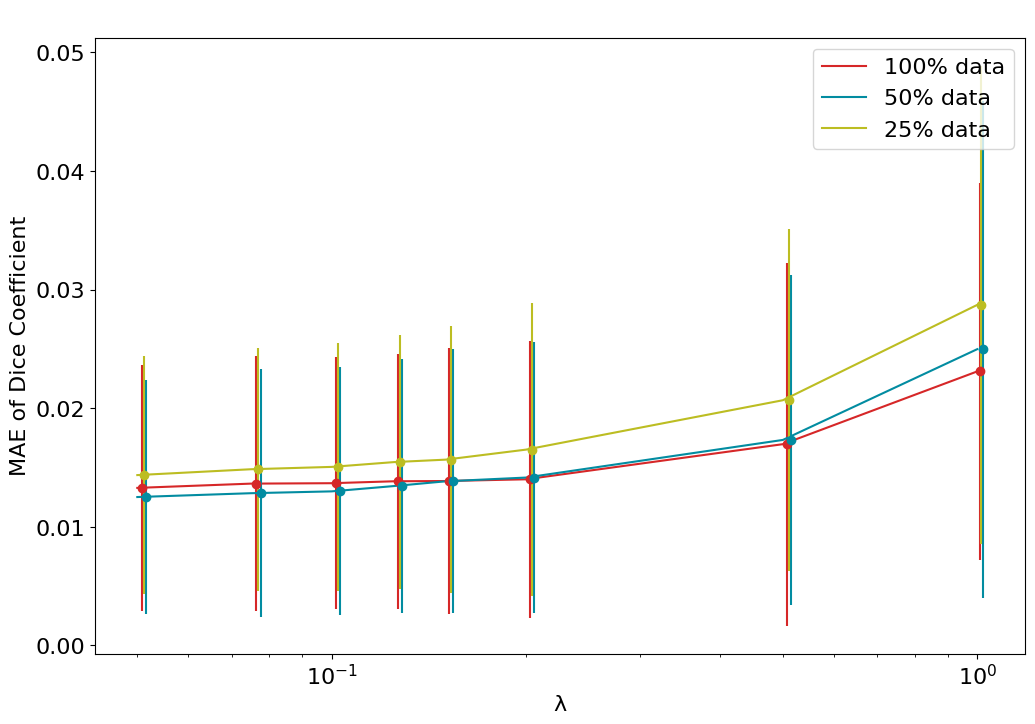

In [41]:

# hundered_percent_data = pd.read_csv("../results/symnet_clapirn/sampled_lamda_values_images.csv")
hundered_percent_data = pd.read_csv("../results/symnet_clapirn/final_result/data_size/xavier_100%_target.csv")
fifty_percent_data = pd.read_csv("../results/symnet_clapirn/final_result/data_size/xavier_50%_target.csv")
twentyfive_percent_data = pd.read_csv("../results/symnet_clapirn/final_result/data_size/xavier_25%_target.csv")

lamda = fifty_percent_data["lamda"].unique()
lam_log = np.where(lamda > 0, np.log(lamda), np.log(lamda + 1e-5))


x_errorbar = [0.0008,0.0013 ,0.0015,0.0017,0.0020,0.003,0.007, 0.01] 

#100% data
hundered_percent_data["dice_difference"] = abs(hundered_percent_data["predicted_dice"] - hundered_percent_data["target_dice"])
hundered_percent_data["std_dev"] = np.std(hundered_percent_data["predicted_dice"] - hundered_percent_data["target_dice"], axis = 0)
mean_difference =  hundered_percent_data.groupby("lamda").mean().reset_index()
std_dev = hundered_percent_data.groupby("lamda").std().reset_index()
sns.lineplot(x=lamda, y=mean_difference["dice_difference"], color="#d62728")
plt.errorbar(x_errorbar+lamda, mean_difference["dice_difference"], yerr=std_dev["dice_difference"], fmt='o', color = '#d62728')

#50% data
fifty_percent_data["dice_difference"] = abs(fifty_percent_data["predicted_dice"] - fifty_percent_data["target_dice"])
fifty_percent_data["std_dev"] = np.std(fifty_percent_data["predicted_dice"] - fifty_percent_data["target_dice"], axis = 0)
mean_difference =  fifty_percent_data.groupby("lamda").mean().reset_index()
std_dev = fifty_percent_data.groupby("lamda").std().reset_index()
sns.lineplot(x=lamda, y=mean_difference["dice_difference"], color="#028ca1")
plt.errorbar([x*2 for x in x_errorbar]+lamda, mean_difference["dice_difference"], yerr=std_dev["dice_difference"], fmt='o', color = '#028ca1')


#25% data
twentyfive_percent_data["dice_difference"] = abs(twentyfive_percent_data["predicted_dice"] - twentyfive_percent_data["target_dice"])
mean_difference =  twentyfive_percent_data.groupby("lamda").mean().reset_index()
std_dev = twentyfive_percent_data.groupby("lamda").std().reset_index()
sns.lineplot(x=lamda, y=mean_difference["dice_difference"], color="#bcbd22")
plt.errorbar([x*1.5 for x in x_errorbar]+lamda, mean_difference["dice_difference"], yerr=std_dev["dice_difference"], fmt='o', color = '#bcbd22')


# Create custom legend
custom_legend = [
    plt.Line2D([0], [0], color='#d62728',  linestyle='-', markersize=5),
    plt.Line2D([0], [0], color='#028ca1',  linestyle='-', markersize=5),
    plt.Line2D([0], [0], color='#bcbd22', linestyle='-', markersize=5),
]
legend_labels = ['100% data','50% data', '25% data']

plt.legend(custom_legend, legend_labels)
plt.title(" ");
plt.xlabel("λ");
plt.ylabel("MAE of Dice Coefficient");
plt.xscale("log")
plt.show()


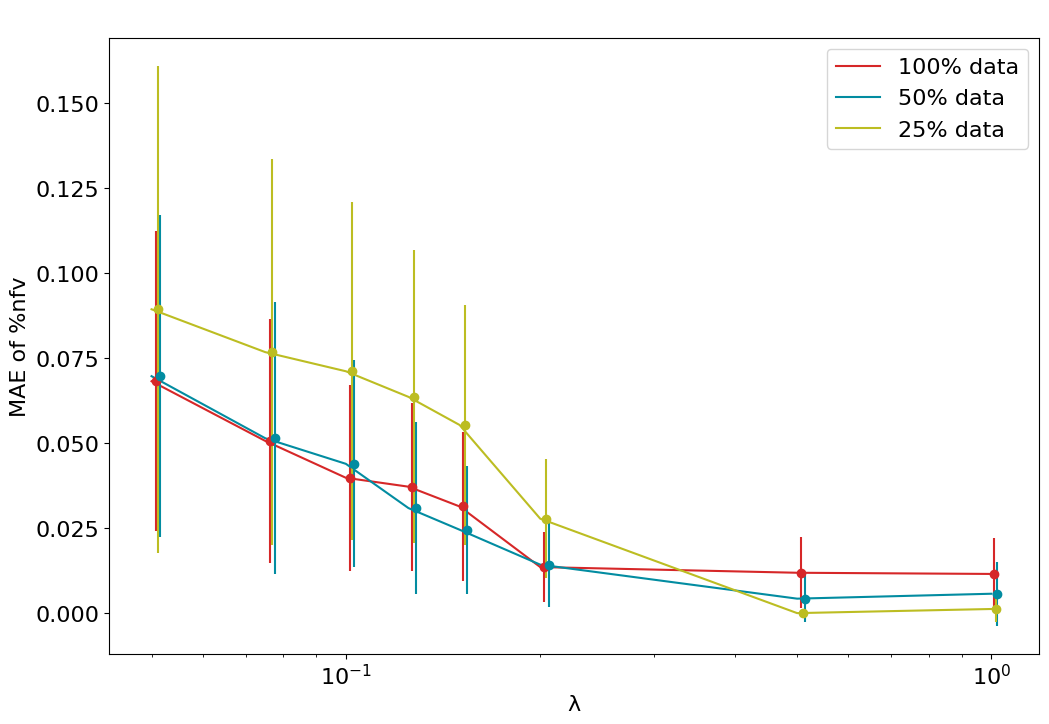

In [43]:
#nfv difference
hundered_percent_data["nfv_difference"] = abs((hundered_percent_data["predicted_nfv"]/ maximum_nfv)*100 - (hundered_percent_data["target_nfv"]/maximum_nfv)*100)
mean_difference =  hundered_percent_data.groupby("lamda").mean().reset_index()
std_dev = hundered_percent_data.groupby("lamda").std().reset_index()
sns.lineplot(x=lamda, y=mean_difference["nfv_difference"], color="#d62728")
plt.errorbar(x_errorbar + lamda, mean_difference["nfv_difference"], yerr=std_dev["nfv_difference"], fmt='o', color = '#d62728')

fifty_percent_data["nfv_difference"] = abs((fifty_percent_data["predicted_nfv"]/ maximum_nfv)*100 - (fifty_percent_data["target_nfv"]/maximum_nfv)*100)
mean_difference =  fifty_percent_data.groupby("lamda").mean().reset_index()
std_dev = fifty_percent_data.groupby("lamda").std().reset_index()
sns.lineplot(x=lamda, y=mean_difference["nfv_difference"], color="#028ca1", errorbar="sd")
plt.errorbar([x*2 for x in x_errorbar]+lamda, mean_difference["nfv_difference"], yerr=std_dev["nfv_difference"], fmt='o', color='#028ca1')

twentyfive_percent_data["nfv_difference"] = abs((twentyfive_percent_data["predicted_nfv"]/ maximum_nfv)*100 - (twentyfive_percent_data["target_nfv"]/maximum_nfv)*100)
mean_difference =  twentyfive_percent_data.groupby("lamda").mean().reset_index()
std_dev = twentyfive_percent_data.groupby("lamda").std().reset_index()
sns.lineplot(x=lamda, y=mean_difference["nfv_difference"], color="#bcbd22")
plt.errorbar([x*1.5 for x in x_errorbar]+lamda, mean_difference["nfv_difference"], yerr=std_dev["nfv_difference"], fmt='o', color='#bcbd22')


custom_legend = [
    plt.Line2D([0], [0], color='#d62728',  linestyle='-', markersize=5),
    plt.Line2D([0], [0], color='#028ca1',  linestyle='-', markersize=5),
    plt.Line2D([0], [0], color='#bcbd22', linestyle='-', markersize=5),
]
legend_labels = ['100% data', '50% data', '25% data']

plt.legend(custom_legend, legend_labels)
plt.title(" ");
plt.xlabel("λ");
plt.ylabel("MAE of %nfv");
plt.xscale('log')
plt.show()


### SENSITIVITY ANALYSIS

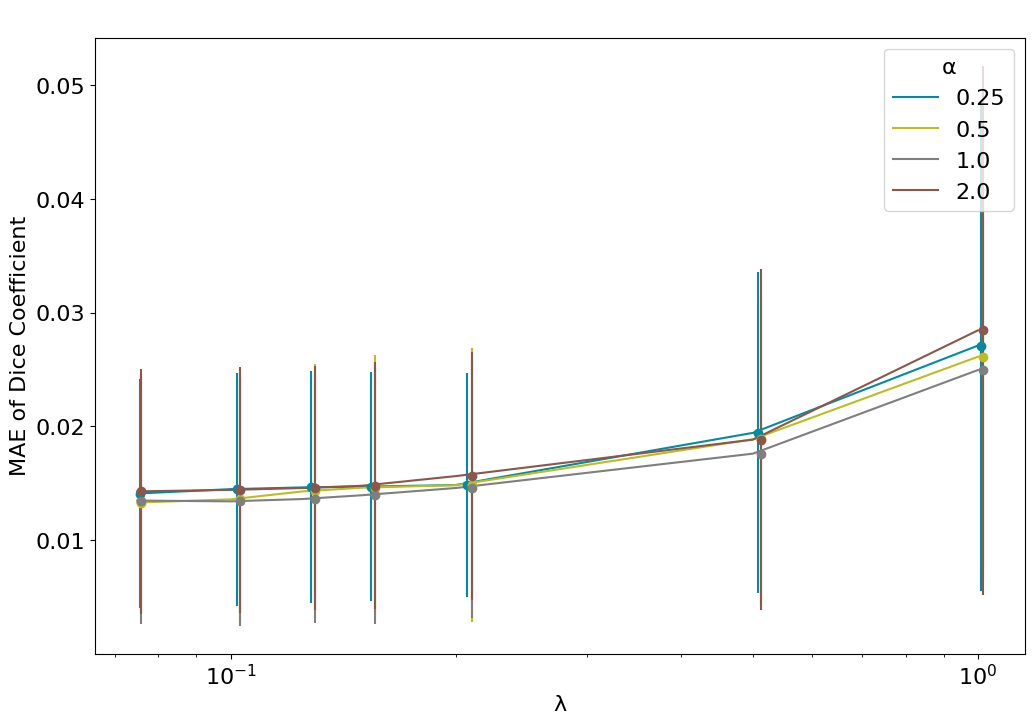

In [6]:

sensitivity_025 = pd.read_csv("../results/symnet_clapirn/final_result/sensitivity_analysis/xavier_0.25_seeded_target.csv")
sensitivity_05 = pd.read_csv("../results/symnet_clapirn/final_result/sensitivity_analysis/xavier_0.5_seeded_target.csv")
sensitivity_10 = pd.read_csv("../results/symnet_clapirn/final_result/sensitivity_analysis/xavier_1.0_seeded_target.csv")
sensitivity_20 = pd.read_csv("../results/symnet_clapirn/final_result/sensitivity_analysis/xavier_2.0_seeded_target.csv")

sensitivity_025 = sensitivity_025[sensitivity_025["lamda"] >= 0.075]
sensitivity_05 = sensitivity_05[sensitivity_05["lamda"] >= 0.075]
sensitivity_10 = sensitivity_10[sensitivity_10["lamda"] >= 0.075]
sensitivity_20 = sensitivity_20[sensitivity_20["lamda"] >= 0.075]

lamda = sensitivity_025["lamda"].unique()
lam_log = np.where(lamda > 0, np.log(lamda), np.log(lamda + 1e-5))
x_errorbar = [0.0006,0.002 ,0.003,0.004,0.007,0.008,0.01] 


#0.25
sensitivity_025["dice_difference"] = abs(sensitivity_025["predicted_dice"] - sensitivity_025["target_dice"])
sensitivity_025["std_dev"] = np.std(sensitivity_025["predicted_dice"] - sensitivity_025["target_dice"], axis = 0)
mean_difference =  sensitivity_025.groupby("lamda").mean().reset_index()
std_dev = sensitivity_025.groupby("lamda").std().reset_index()
sns.lineplot(x=lamda, y=mean_difference["dice_difference"], color="#028ca1", linestyle='-')
plt.errorbar(x_errorbar +lamda, mean_difference["dice_difference"], yerr=std_dev["dice_difference"], fmt='o', color = '#028ca1')


#0.5
sensitivity_05["dice_difference"] = abs(sensitivity_05["predicted_dice"] - sensitivity_05["target_dice"])
mean_difference =  sensitivity_05.groupby("lamda").mean().reset_index()
std_dev = sensitivity_05.groupby("lamda").std().reset_index()
sns.lineplot(x=lamda, y=mean_difference["dice_difference"], color="#bcbd22", linestyle='-')
plt.errorbar([x*1.5 for x in x_errorbar]+lamda, mean_difference["dice_difference"], yerr=std_dev["dice_difference"], fmt='o', color = '#bcbd22')



#1.0
sensitivity_10["dice_difference"] = abs(sensitivity_10["predicted_dice"] - sensitivity_10["target_dice"])
sensitivity_10["std_dev"] = np.std(sensitivity_10["predicted_dice"] - sensitivity_10["target_dice"], axis = 0)
mean_difference =  sensitivity_10.groupby("lamda").mean().reset_index()
std_dev = sensitivity_10.groupby("lamda").std().reset_index()
sns.lineplot(x=lamda, y=mean_difference["dice_difference"], color="#7f7f7f", linestyle='-')
plt.errorbar([x*1.5 for x in x_errorbar]+lamda, mean_difference["dice_difference"], yerr=std_dev["dice_difference"], fmt='o', color = '#7f7f7f')

#2.0
sensitivity_20["dice_difference"] = abs(sensitivity_20["predicted_dice"] - sensitivity_20["target_dice"])
sensitivity_20["std_dev"] = np.std(sensitivity_20["predicted_dice"] - sensitivity_20["target_dice"], axis = 0)
mean_difference =  sensitivity_20.groupby("lamda").mean().reset_index()
std_dev = sensitivity_20.groupby("lamda").std().reset_index()
sns.lineplot(x=lamda, y=mean_difference["dice_difference"], color="#8c564b", linestyle='-')
plt.errorbar([x*1.5 for x in x_errorbar]+lamda, mean_difference["dice_difference"], yerr=std_dev["dice_difference"], fmt='o', color = '#8c564b')



custom_legend = [
    plt.Line2D([0], [0], color='#028ca1',  linestyle='-', markersize=5),
    plt.Line2D([0], [0], color='#bcbd22', linestyle='-', markersize=5),
    plt.Line2D([0], [0], color='#7f7f7f',  linestyle='-', markersize=5),
    plt.Line2D([0], [0], color='#8c564b', linestyle='-', markersize=5)

]
legend_labels = ['0.25', '0.5',  '1.0', '2.0']

plt.legend(custom_legend, legend_labels, title="α")
plt.title(" ");
plt.xlabel("λ");
plt.ylabel("MAE of Dice Coefficient");
plt.xscale("log")
plt.show()


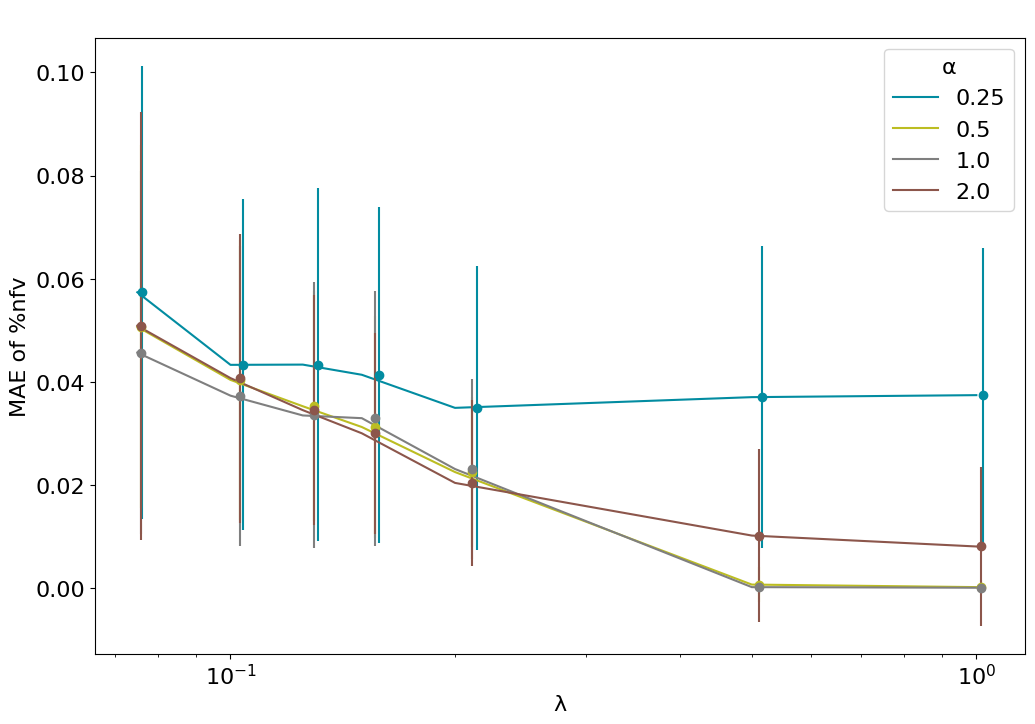

In [5]:
#nfv difference

sensitivity_025["nfv_difference"] = abs((sensitivity_025["predicted_nfv"]/ maximum_nfv)*100 - (sensitivity_025["target_nfv"]/maximum_nfv)*100)
mean_difference =  sensitivity_025.groupby("lamda").mean().reset_index()
std_dev = sensitivity_025.groupby("lamda").std().reset_index()
sns.lineplot(x=lamda, y=mean_difference["nfv_difference"], color="#028ca1", errorbar="sd", linestyle='-')
plt.errorbar([x*2 for x in x_errorbar]+lamda, mean_difference["nfv_difference"], yerr=std_dev["nfv_difference"], fmt='o', color='#028ca1')

sensitivity_05["nfv_difference"] = abs((sensitivity_05["predicted_nfv"]/ maximum_nfv)*100 - (sensitivity_05["target_nfv"]/maximum_nfv)*100)
mean_difference =  sensitivity_05.groupby("lamda").mean().reset_index()
std_dev = sensitivity_05.groupby("lamda").std().reset_index()
sns.lineplot(x=lamda, y=mean_difference["nfv_difference"], color="#bcbd22", linestyle='-')
plt.errorbar([x*1.5 for x in x_errorbar]+lamda, mean_difference["nfv_difference"], yerr=std_dev["nfv_difference"], fmt='o', color='#bcbd22')


sensitivity_10["nfv_difference"] = abs((sensitivity_10["predicted_nfv"]/ maximum_nfv)*100 - (sensitivity_10["target_nfv"]/maximum_nfv)*100)
mean_difference =  sensitivity_10.groupby("lamda").mean().reset_index()
std_dev = sensitivity_10.groupby("lamda").std().reset_index()
sns.lineplot(x=lamda, y=mean_difference["nfv_difference"], color="#7f7f7f", errorbar="sd", linestyle='-')
plt.errorbar([x*1.5 for x in x_errorbar]+lamda, mean_difference["nfv_difference"], yerr=std_dev["nfv_difference"], fmt='o', color='#7f7f7f')

sensitivity_20["nfv_difference"] = abs((sensitivity_20["predicted_nfv"]/ maximum_nfv)*100 - (sensitivity_20["target_nfv"]/maximum_nfv)*100)
mean_difference =  sensitivity_20.groupby("lamda").mean().reset_index()
std_dev = sensitivity_20.groupby("lamda").std().reset_index()
sns.lineplot(x=lamda, y=mean_difference["nfv_difference"], color="#8c564b", linestyle='-')
plt.errorbar([x*1.5 for x in x_errorbar]+lamda, mean_difference["nfv_difference"], yerr=std_dev["nfv_difference"], fmt='o', color='#8c564b')


custom_legend = [
    plt.Line2D([0], [0], color='#028ca1',  linestyle='-', markersize=5),
    plt.Line2D([0], [0], color='#bcbd22', linestyle='-', markersize=5),
    plt.Line2D([0], [0], color='#7f7f7f',  linestyle='-', markersize=5),
    plt.Line2D([0], [0], color='#8c564b', linestyle='-', markersize=5)

]
legend_labels = ['0.25', '0.5',  '1.0', '2.0']

plt.legend(custom_legend, legend_labels, title="α")
plt.title(" ");
plt.xlabel("λ");
plt.ylabel("MAE of %nfv");
plt.xscale('log')
plt.show()
